In [73]:
import pandas as pd
import numpy as np


def list_of_categories(category="male"):
    if category == "male":
        return ["boy", "grandfather", "man", "father", "dad"]
    elif category == "female":
        return ["girl", "grandmother", "woman", "mother", "mom"]
    elif category == "animal":
        return ["cat", "dog", "cow", "pig", "kitten", "lamb", "sheep", "horse", "goat"]
    elif category == "control_humans":
        return ["boy", "grandfather", "man", "father", "dad"] + ["girl", "grandmother", "woman", "mother", "mom"]
    


In [74]:

histo_male_age=[]
histo_male_pat=[]
histo_female_age=[]
histo_female_pat=[]
histo_animal_age=[]
histo_animal_pat=[]
histo_control_humans_age=[]
histo_control_humans_pat=[]

years = [str(i) for i in range(1820, 2020, 10)]
for i in years:

    main= pd.read_csv("dep_counts_coha"+str(i)+".csv") 



    main['syn_agency']=(main['nsubj']+1)/(main['dobj']+main['nsubjpass']+2)
    main['syn_patiency']=(main['nsubjpass']+1)+(main['dobj']+1)


    male=main.loc[main['word'].isin(list_of_categories(category="male"))]
    histo_male_age.append(male['syn_agency'].mean())
    histo_male_pat.append(male['syn_patiency'].mean())

    female=main.loc[main['word'].isin(list_of_categories(category="female"))]
    histo_female_age.append(female['syn_agency'].mean())
    histo_female_pat.append(female['syn_patiency'].mean())

    animal=main.loc[main['word'].isin(list_of_categories(category="animal"))]
    histo_animal_age.append(animal['syn_agency'].mean())
    histo_animal_pat.append(animal['syn_patiency'].mean())

    control_humans=main.loc[main['word'].isin(list_of_categories(category="control_humans"))]
    histo_control_humans_age.append(control_humans['syn_agency'].mean())
    histo_control_humans_pat.append(control_humans['syn_patiency'].mean())
    
#subtraction 
    
years = [str(i) for i in range(1820, 2020, 10)]

subtracted_m_f_age = list()
#male and female agency
for item1, item2 in zip(histo_female_age, histo_male_age):
    item = item2 - item1
    subtracted_m_f_age.append(item)
    
subtracted_m_f_pat = list()
#male and female patiency
for item1, item2 in zip(histo_female_pat, histo_male_pat):
    item = item2 - item1
    subtracted_m_f_pat.append(item)
    
subtracted_a_c_age = list()
#animal and control_humans agency
for item1, item2 in zip(histo_control_humans_age, histo_animal_age):
    item = item2 - item1
    subtracted_a_c_age.append(item)
    
subtracted_a_c_pat = list()
#animal and control_humans patiency
for item1, item2 in zip(histo_control_humans_pat, histo_animal_pat):
    item = item2 - item1
    subtracted_a_c_pat.append(item)

In [75]:
###do not care about this part and do not delet it LOL

#years = [str(i) for i in range(1800, 2000, 10)]
#years.insert(0,'name')


#agency = [histo_male_age, histo_female_age , histo_animal_age , histo_control_humans_age]
#patiency = [histo_male_pat, histo_female_pat, histo_animal_pat , histo_control_humans_pat]

#histo_anal_age = pd.DataFrame(agency, columns =years)
#histo_anal_pat = pd.DataFrame(patiency, columns =years)




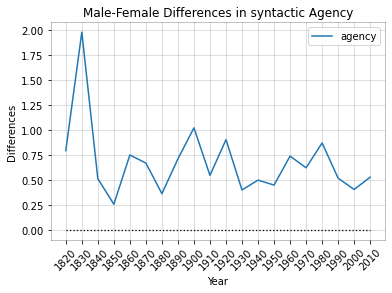

In [76]:
#plot Male-Female Differences in syntactic Agency 
import matplotlib.pyplot as plt


plt.plot(years,subtracted_m_f_age, label = "agency" )
plt.title('Male-Female Differences in syntactic Agency')
plt.xlabel('Year')
plt.ylabel('Differences')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Male_Female_Differences_overtime_agency.pdf", bbox_inches="tight", format="pdf")



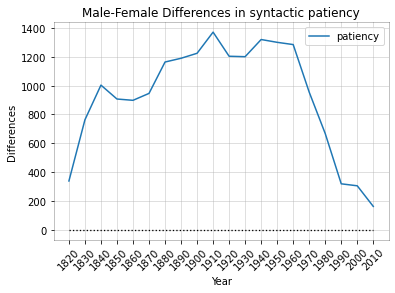

In [77]:
#plot Male-Female Differences in syntactic patiency
import matplotlib.pyplot as plt


plt.plot(years,subtracted_m_f_pat, label = "patiency" )
plt.title('Male-Female Differences in syntactic patiency')
plt.xlabel('Year')
plt.ylabel('Differences')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Male_Female_Differences_overtime_patiency.pdf", bbox_inches="tight", format="pdf")


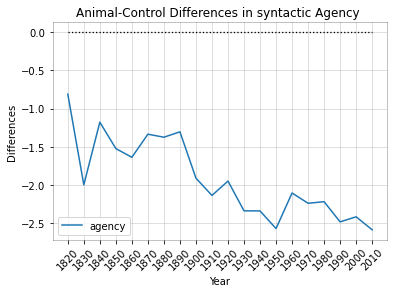

In [78]:
#plot Animal-Control Differences in syntactic Agency 
import matplotlib.pyplot as plt


plt.plot(years,subtracted_a_c_age, label = "agency" )
plt.title('Animal-Control Differences in syntactic Agency ')
plt.xlabel('Year')
plt.ylabel('Differences')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)

plt.savefig("animal_control_Differences_overtime_age.pdf", bbox_inches="tight", format="pdf")

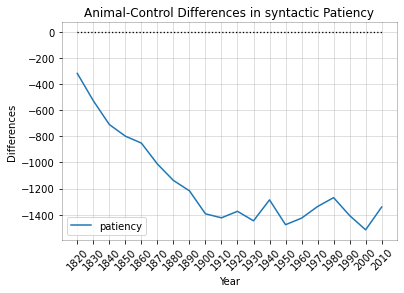

In [79]:
#plot Animal-Control Differences in syntactic Patiency
import matplotlib.pyplot as plt


plt.plot(years,subtracted_a_c_pat, label = "patiency")
plt.title('Animal-Control Differences in syntactic Patiency')
plt.xlabel('Year')
plt.ylabel('Differences')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)

plt.savefig("animal_control_Differences_overtime_pat.pdf", bbox_inches="tight", format="pdf")

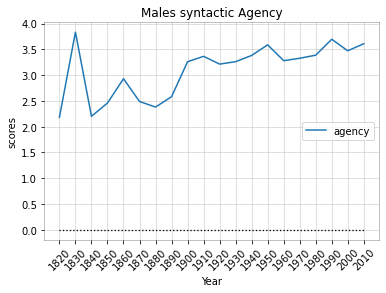

In [80]:
#plot Males syntactic Agency 
import matplotlib.pyplot as plt


plt.plot(years,histo_male_age, label = "agency" )
plt.title('Males syntactic Agency')
plt.xlabel('Year')
plt.ylabel('scores')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Males_Agency_overtime.pdf", bbox_inches="tight", format="pdf")

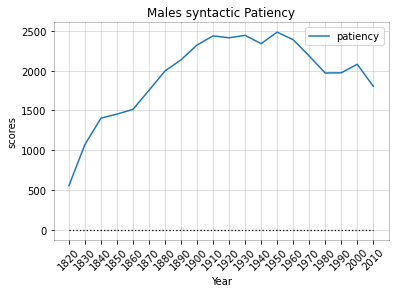

In [81]:
#plot Males syntactic Patiency
import matplotlib.pyplot as plt

plt.plot(years,histo_male_pat, label = "patiency")
plt.title('Males syntactic Patiency')
plt.xlabel('Year')
plt.ylabel('scores')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Males_patiency_overtime.pdf", bbox_inches="tight", format="pdf")

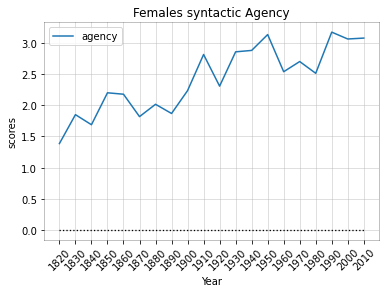

In [82]:
#plot Females syntactic Agency
import matplotlib.pyplot as plt


plt.plot(years,histo_female_age, label = "agency" )
plt.title('Females syntactic Agency')
plt.xlabel('Year')
plt.ylabel('scores')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Females_Agency_overtime.pdf", bbox_inches="tight", format="pdf")

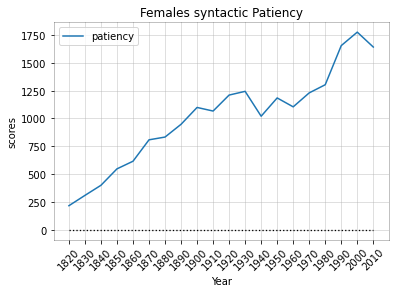

In [83]:
#plot Females syntactic Patiency
import matplotlib.pyplot as plt


plt.plot(years,histo_female_pat, label = "patiency")
plt.title('Females syntactic Patiency')
plt.xlabel('Year')
plt.ylabel('scores')
plt.legend()

plt.xticks(range(len(years)), years, rotation=45)

# line at 0
plt.plot(np.arange(len(years)), [0] * len(years), linestyle="dotted", lw=1.3, c="black")

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.grid(alpha=0.5)
plt.savefig("Females_patiency_overtime.pdf", bbox_inches="tight", format="pdf")